## Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

2024-06-04 14:10:38.664590: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 14:10:38.928565: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 14:10:40.092607: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 14:10:42.761039: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [8]:
tf.__version__


'2.16.1'

In [5]:
tf.test.is_built_with_cuda()


True

### Load the dataset
Our dataset contains 60000 small training images that belongs to one of the below 10 classes



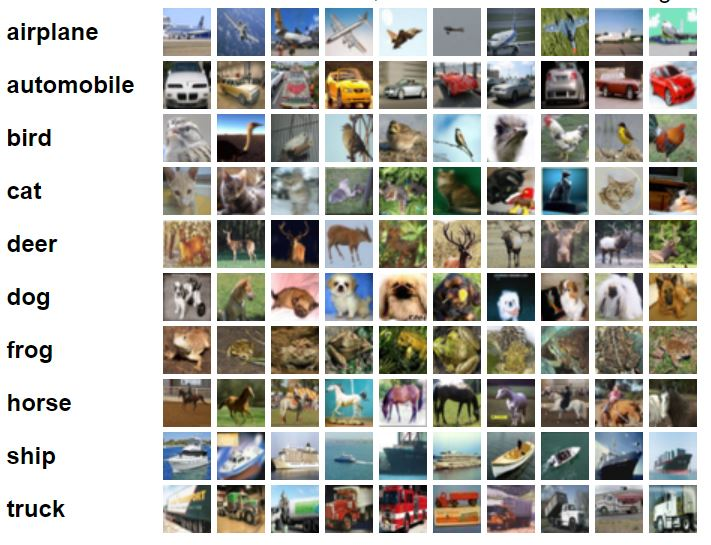

In [6]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [10]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [11]:
y_train.shape

(50000, 1)

In [32]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
# let's see what ytrain contains

def plot_sample(index):
    plt.figure(figsize=(5,1))
    plt.imshow(X_train[index])

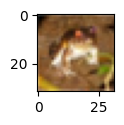

In [22]:
plot_sample(0)

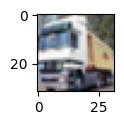

In [23]:
plot_sample(1)

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [25]:
y_train[3]

array([4], dtype=uint8)

In [26]:
classes[y_train[3][0]]

'deer'

## Preprocessing: Scale images


In [28]:
X_train_scale = X_train / 255 # scaled to convert xtrain value betn 0 and 1.
X_test_scale = X_test / 255 # scaled to convert X_test value betn 0 and 1.


In [34]:
# one hot encoding from builtlin libraries

y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

Above array is one hot encoded, where there is only one value is 1 in each row. It means value that has 1 in some index, the corresponding name is present. for example in first row, at index 6 there is value one which means 'frog' is present and rest is absent.

In [35]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)
y_test_categorical[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## Model building and training


In [39]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer = 'SGD', #SGD is good for large ds
              loss = 'categorical_crossentropy', # works well on one hot encoded features
              metrics = ['accuracy']
              )
model.fit(X_train_scale, y_train_categorical, epochs = 5)

Epoch 1/5


2024-06-04 15:55:56.750407: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 65ms/step - accuracy: 0.3013 - loss: 1.9377
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.4199 - loss: 1.6477
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4521 - loss: 1.5584
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.4736 - loss: 1.4823
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.4932 - loss: 1.4421


In [49]:
classes[y_test[1][0]]

'ship'

In [48]:
model.predict(X_train_scale)[1]

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step


array([0.66106033, 0.97956914, 0.17735092, 0.2811504 , 0.12154043,
       0.31575683, 0.03497677, 0.13059568, 0.97249866, 0.93624675],
      dtype=float32)

### It is the probability of each of the classes.
### let's find which classes has the high probability

In [50]:
np.argmax(model.predict(X_train_scale)[1])

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step


1

In [47]:
classes[np.argmax(model.predict(X_train_scale)[0])]

   7/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step

2024-06-04 16:09:40.094353: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step


'frog'

The reason I didn't get good result because, I have less number of epoch, if you take more than 10 epochs then model will perform well.

I didn't initalized more epoch my device is very slow.

### Let's build a fucntion to measure training time in cpu and gpu

In [51]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model